<a href="https://colab.research.google.com/github/fkvl0327/deepLearning/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EB%94%A5%EB%9F%AC%EB%8B%9D_1%EA%B6%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 퍼셉트론

## 2.1 퍼셉트론이란?

- 다수의 신호를 받아 하나의 신호를 출력

## 2.2 단순한 논리회로

### 2.2.1 AND 게이트

- x1과 x2 모두가 1일 때만 가중 신호의 총합이 주어진 임계값을 웃돈다.

### 2.2.2 NAND 게이트와 OR 게이트

- NAND = Not AND

> AND 게이트의 출력을 뒤집은 것

> x1과 x2 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력

- OR 게이트: 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [170]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [171]:
AND(0,0)

0

In [172]:
AND(1,0)

0

In [173]:
AND(0,1)

0

In [174]:
AND(1,1)

1

### 2.3.2 가중치와 편향 도입

- -theta를 편향 b로 치환

In [175]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
w*x

array([0. , 0.5])

In [176]:
np.sum(w*x)

0.5

In [177]:
np.sum(w*x)+b

-0.19999999999999996

### 2.3.3 가중치와 편향 구현하기

- AND 게이트

In [178]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <=0:
        return 0
    else:
        return 1

- NAND 게이트

In [179]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

- OR 게이트

In [180]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x)+b
    if tmp <=0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

### 2.4.1 XOR 게이트

- 배타적 논리합: x1과 x2 중 한쪽이 1일 때만 1을 출력

### 2.4.2 선형과 비선형

- 단순 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다.
- 곡선의 영역을 비선형 영역, 직선의 영역을 선형 영역이라고 한다.

## 2.5 다층 퍼셉트론

### 2.5.1 기존 게이트 조합하기

- x1과 x2가 입력 신호, y가 출력 신호
- x1과 x2는 NAND와 OR 게이트의 입력, NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다.

### 2.5.2 XOR 게이트 구현하기

In [181]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [182]:
XOR(0,0)

0

In [183]:
XOR(1,0)

1

In [184]:
XOR(0,1)

1

In [185]:
XOR(1,1)

0

# 3 신경망

- 퍼셉트론

> GOOD: 복잡한 함수도 표현할 수 있다

> BAD: 가중치를 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 사람이 수동으로 한다 = AND, OR 게이트의 진리표를 보면서 인간이 적절한 가중치 값을 결정

- 신경망이 퍼셉트론의 한계를 개선한다

> 신경망의 중요한 성질: 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력

- 이번 장의 내용

> 신경망 개요 설명

> 신경망이 입력 데이터가 무엇인지 식별하는 처리과정을 살펴봄


* 데이터에서 가중치 매개변수 값을 학습하는 방법은 다음 장에서

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

- 입력층 > 은닉층 > 출력층

### 3.1.2 퍼셉트론 복습

- $x_1$과 $x_2$라는 두 신호를 입력받아 y를 출력하는 퍼셉트론

> $y=0(b+w_1x_1+w_2x_2\leq0)$  
> $y=1(b+w_1x_1+w_2x_2>0)$

> b는 편향을 나타내는 매개변수, 뉴런이 얼마나 쉽게 활성화되는지를 제어

> $w_1$과 $w_2$는 각 신호의 가중치를 나타내는 매개변수, 각 신호의 영향력을 제어

- 더 간결한 형태로 다시 작성해 보면

> $y=h(b+w_1x_1+w_2x_2)$

> $h(x) = 0(x\leq0)$ or $1(x>0)$ 

### 3.1.3 활성화 함수의 등장

- $h(x)$와 같이 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수(activation function)라 한다.
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수(sigmoid function)

$h(x) = \frac{1}{1+exp(-x)}$

- exp$(-x)$는 $e^{-x}$를 뜻함
- $e$는 자연상수로 2.7182...의 값을 갖는 실수
- 예를 들어 시그모이드 함수에 1.0과 2.0을 입력하면 $h(1.0)=0.731...$, $h(2.0)=0.880...$처럼 특정 값을 출력한다.

### 3.2.2 계단 함수 구현하기

- 계단 함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [186]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

- 인수 x는 실수(부동소수점)만 받아들이므로, 넘파이 배열을 파라미터로 넣을 수는 없다.
- 넘파이 배열도 지원하도록 아래와 같이 수정한다.

In [187]:
def step_function(x):
    y=x>0
    return y.astype(np.int)

### 3.2.3 계단 함수의 그래프

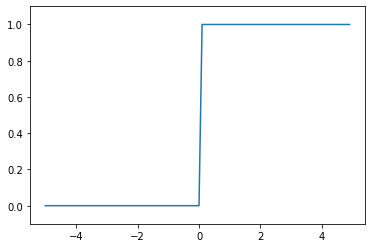

In [188]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

- 인수 $x$가 넘파이 배열이어도 올바른 결과가 나온다.

In [189]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 시그모이드 함수를 그래프로 그려보자.

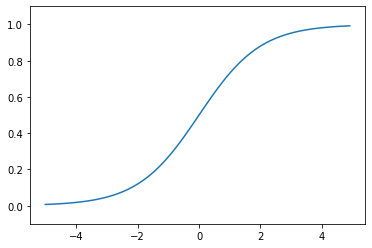

In [190]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드는 S자 모양

### 3.2.5 시그모이드 함수와 계단 함수 비교

- 시그모이드
 - 부드러운 곡선  
 - 입력에 따라 출력이 연속적으로 변화  
 - 실수를 리턴

- 계단 함수
 - 0을 경계로 출력이 갑자기 변화  
 - 0과 1 중 하나의 값만 리턴

- 시그모이드 함수의 '매끈함'이 신경망 학습에서 아주 중요한 역할

### 3.2.6 비선형 함수

- 선형 함수
 - $f(x)=ax+b$
 - 출력이 입력의 상수배만큼 변하는 함수
 - 그래프는 곧은 1개의 직선

- 비선형 함수
 - 선형이 아닌 함수
 - 직선 1개로는 그릴 수 없는 함수
 - 시그모이드 함수와 계단 함수는 모두 비선형 함수

- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.  
 = 선형 함수를 사용해서는 안 된다.
  ∵ 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없다.

- 선형 함수의 문제  
 = 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.  
 = 층을 쌓는 혜택을 얻을 수 없다.

### 3.2.7 ReLU 함수

- Rectified Linear Unit, 렐루
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수
- $h(x) = x(x>0)$ or $h(x) = 0(x\leq0)$

In [191]:
def relu(x):
    return np.maximum(0, x)

- 책 후반부에서는 주로 ReLU 함수를 사용한다.

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

- 2차원 배열은 특히 행렬matrix이라고 부르고, 배열의 가로 방향을 행row, 세로 방향을 열column이라고 한다.

### 3.3.2 행렬의 곱

- 행렬의 곱에서는 대응하는 차원의 원소 수가 같아야 한다.
- $3*2$ 행렬 A와 $2*4$ 행렬 B를 곱해 $3*4$ 행렬 C를 만들 때, 행렬 C의 형상은 행렬 A의 행 수와 행렬 B의 열 수가 된다.
- A가 2차원 행렬이고 B가 1차원 배열일 때도 대응하는 차원의 원소 수를 일치시킨다.

### 3.3.3 신경망에서의 행렬 곱

In [192]:
>>> X = np.array([1, 2])
>>> X.shape

(2,)

In [193]:
>>> W = np.array([[1,3,5], [2,4,6]])
>>> print(W)

[[1 3 5]
 [2 4 6]]


In [194]:
>>> W.shape

(2, 3)

In [195]:
>>> Y = np.dot(X, W)
>>> print(Y)

[ 5 11 17]


- 행렬의 곱으로 한꺼번에 계산해주는 기능(np.dot(X,W))은 신경망을 구현할 때 매우 중요하다.

## 3.4 3층 신경망 구현하기

- 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

### 3.4.1 표기법 설명

### 3.4.2 각 층의 신호 전달 구현하기

### 3.4.3 구현 정리

## 3.5 출력층 설계하기

- 신경망은 분류와 회귀 모두에 이용할 수 있다.
 - 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수는 다르다.
 - 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.
- 기계학습 문제는 분류classification와 회귀regression로 나뉜다.
 - 분류: 데이터가 어느 클래스에 속하느냐는 문제 ex. 사진 속 인물의 성별 분류
 - 회귀: 입력 데이터에서 (연속적인) 수치를 예측하는 문제 ex. 사진 속 인물의 몸무게를 예측하는 문제 

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.

- 항등 함수identity function: $σ()$
 - 입력을 그대로 출력
 - 출력층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 된다.

- 소프트맥스 함수softmax function: $y_k= \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$
 - $exp(x)$는 $e^x$을 뜻하는 지수 함수exponential function($e$는 자연상수)
 - $n$은 출력층의 뉴런 수
 - $y_k$는 그중 k번째 출력임을 의미
 - 소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.
 - 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받는다.

In [196]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

- 컴퓨터는 수를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다루므로 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없는 문제가 발생하며, 이를 오버플로overflow라 한다.
- 소프트맥스 함수에서 사용하는 지수 함수는 쉽게 아주 큰 값을 리턴하므로, 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다.
- 이 문제를 해결하도록 소프트맥스 함수 구현을 개선해 보자.
>  
$y_k= \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$
 $=\frac{Cexp(a_k)}{C\sum_{i=1}^{n}exp(a_i)}$
 $=\frac{exp(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)}$
 $=\frac{exp(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')}$  

 > 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음을 알 수 있다.  

 > $C'$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

 > 이를 활용하여 위에서 구현한 소프트맥스 함수를 다음과 같이 개선할 수 있다. (입력 신호 중 최댓값을 뺌)

In [197]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수
- 소프트맥스 함수 출력의 총합은 1 -> 소프트맥스 함수의 출력은 확률로 해석할 수 있다.
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.  
 ∵지수 함수 $y=exp(x)$가 단조 증가 함수
 - 단조 증가 함수란? 정의역 원소 a, b가 $a\leq b$일 때, $f(a)\leq f(b)$가 성립하는 함수

- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하고, 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않기 때문에, 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다. 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다.

- 기계학습의 문제 풀이는 학습과 추론inference의 두 단계를 거쳐 이뤄진다. 학습 단계에서 모델을 학습하고, 추론 단계에서 앞서 학습한 모델로 미지의 데이터에 대해 추론을 수행한다. <u>추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적</u>인 반면, 신경망을 <u>학습시킬 때는 출력층에서 소프트맥스 함수를 사용</u>한다.



### 3.5.4 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 풀려는 문제에 맞게 정한다.
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적  
 ex) 입력 이미지를 0부터 9 중 하나로 분류하는 문제라면, 출력층의 뉴런을 10개로 설정

## 3.6 손글씨 숫자 인식

- 머신러닝과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다.
 1.   학습: 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습 
 2.   추론: 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류

### 3.6.1 MNIST 데이터셋

In [198]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [199]:
import numpy as np
from mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

In [200]:
# 아래에서 open하는 sample_weight.pkl 파일 업로드
# from google.colab import files 
# file_uploaded = files.upload()

# 피클 임포트
import pickle

# 3.5.2에서 만든 softmax 함수 재사용
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

- 배치 처리는 컴퓨터 계산 시 큰 이점이 있다.  
 1) 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있다.  
 2) 커다란 신경망에서는 데이터 전송이 병복으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄인다.(느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐)

 > 배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다.

## 3.7 정리

- 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 퍼셉트론과 같다.
- BUT 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있다.
 - 신경망에서는 매끄럽게 변화하는 시그모이드 함수를 활성화 함수로 사용  
 - 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용

# 4 신경망 학습

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수: 신경망이 학습할 수 있도록 해주는 지표
- 학습의 목표: 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것
- 목표 달성을 위해 이번 장에서 소개하는 방법: 함수의 기울기를 활용하는 경사법

## 4.1 데이터에서 학습한다!

- 신경망에서는 매개변수가 수천에서 수만 개에 이르고, 층을 깊게 한 딥러닝의 경우 수억에 이를 수도 있으므로 매개변수를 수작업으로 정하는 것이 불가능하다.

---
- 선형 분리 가능 문제는 유한 번의 학습을 통해 풀 수 있다: 퍼셉트론 수렴 정리
- 비선형 분리 문제는 자동으로 학습할 수 없다.

### 4.1.1 데이터 주도 학습

1) 사람이 생각한 알고리즘  
2) 사람이 생각한 특징(SIFT, HOG 등) + 기계학습(SVM, KNN 등)  
3) 신경망(딥러닝): 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습  

* 딥러닝을 종단간 기계학습end-to-end machine learning이라고도 함  
  = 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻음
* 신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점  
  = 세부사항과 관계없이 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도

### 4.1.2 훈련 데이터와 시험 데이터

- 훈련 데이터와 시험 데이터를 분리하는 이유: 범용 능력을 제대로 평가하기 위해
- 범용 능력이란?
 - 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력  
 - 범용 능력을 획득하는 것이 기계학습의 최종 목표
- 따라서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다.
- 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅overfitting이라고 한다. 오버피팅 피하기는 기계학습의 중요한 과제이다.

## 4.2 손실 함수

- 신경망에서는 하나의 지표를 기준으로 최적의 매개변수 값을 탐색하며, 이 지표를 손실 함수loss function라고 한다.
- 손실 함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.
- 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못'하느냐를 나타낸다.
 - 손실 함수에 마이너스만 곱하면 '얼마나 좋은지'를 나타낸다.
 - '나쁨을 최소로 하는 것'과 '좋음을 최대로 하는 것'은 결국 같은 것이므로, 어느 쪽을 지표로 삼아도 본질적으로 수행하는 일은 같다. 

### 4.2.1 오차제곱합

- 오차제곱합sum of squares for error, SSE은 가장 많이 쓰이는 손실 함수이다.
- $E = \frac{1}{2}\sum_{k}(y_k-t_k)^2$
- $y_k$는 신경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수
- 신경망의 출력 $y$는 소프트맥스 함수의 출력이며, 소프트맥스 함수의 출력은 확률로 해석할 수 있다.
- 정답 레이블인 $t$는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기한다.(원-핫 인코딩)

▼ 3.6 손글씨 숫자 인식에서 데이터를 가져오자.

In [201]:
import numpy as np

# 오차제곱합을 파이썬으로 구현
def sse(y, t):
    return 0.5 * np.sum((y-t)**2)

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [202]:
# 예1: '2'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sse(np.array(y), np.array(t))

0.09750000000000003

In [203]:
# 예2: '7'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sse(np.array(y), np.array(t))

0.5975

- 오차제곱합 값이 작은 것이 정답에 더 가까운 것으로 판단

### 4.2.2 교차 엔트로피 오차

- 교차 엔트로피 오차: cross entropy error, CEE
- $E = -\sum_{k}t_klogy_k$
- $log$는 밑이 $e$인 자연로그, $y_k$는 신경망의 출력, $t_k$는 정답 레이블
- $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0

 ∴ 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산  
 (정답이 아닌 나머지 모두는 $t_k$가 0이므로 $logy_k$와 곱해도 0이 되어 결과에 영향을 주지 않음)

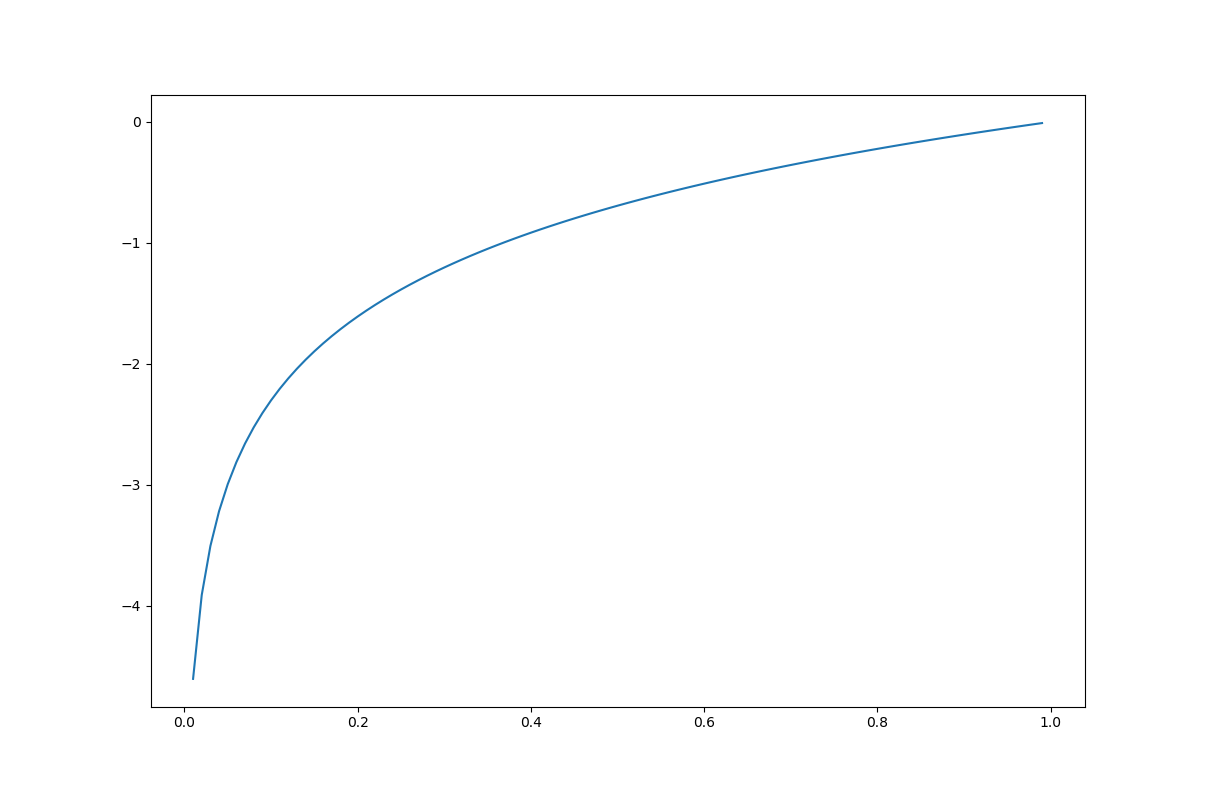

In [204]:
from IPython.display import Image
Image('자연로그 그래프.png')

$x$가 1일 때 $y$는 0이 되고 $x$가 0에 가까워질수록 $y$의 값은 점점 작아짐

In [205]:
def cee(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [206]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cee(np.array(y), np.array(t))

0.510825457099338

In [207]:
# 예2: '7'일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee(np.array(y), np.array(t))

2.302584092994546

- 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단
- 앞서 오차제곱합의 판단과 일치

### 4.2.3 미니배치 학습

- 훈련 데이터 중 일부만 골라 학습을 수행할 때, 그 일부를 미니배치mini-batch라고 한다.

In [208]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [209]:
# 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현
def cee(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [210]:
# 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등 숫자 레이블로 주어졌을 때
def cee(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7))/batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

Q. '정확도'라는 지표를 두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 무엇일까?

A. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.  
-> '계단 함수'를 활성화 함수로 사용하지 않는 이유와 같다고 할 수 있다.

## 4.3 수치 미분

### 4.3.1 미분

In [211]:
# 미분 수식을 그대로 구현한 예
def numerical_diff(f,x):
    h = 10e-50
    return (f(x+h)-f(x))/h



- 1e-50을 float32형(32비트 부동소수점)으로 나타내면 0.0이 되어 올바로 표현할 수 없다.
- <u>첫 번째 개선점: 미세한 값 h로 $10^{-4}$를 이용하자.</u>

- 아주 작은 차분(임의 두 점에서의 함수 값들의 차이)으로 미분하는 것, 즉 근사치로 계산하는 것을 수치 미분이라고 한다.  
cf. 수식을 전개해 미분하는 것은 해석적 미분이라고 하며, 해석적 미분은 오차를 포함하지 않는 '진정한 미분' 값을 구한다.
- <u>두 번째 개선점: 진정한 미분과 수치 미분의 값은 다르므로, 오차를 줄이기 위해 $(x+h)$와 $(x-h)$일 때의 함수 $f$의 차분을 계산하는 방법을 사용한다.</u>

* 이 차분은 $x$를 중심으로 그 전후의 차분을 계산한다는 의미에서 <b>중심 차분</b> 또는 <b>중앙 차분</b>이라고 한다. (한편 $(x+h)$와 $x$의 차분은 <b>전방 차분</b>이라 한다.)

In [212]:
# 두 개선점을 적용해 수치 미분을 다시 구현
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

### 4.3.2 수치 미분의 예

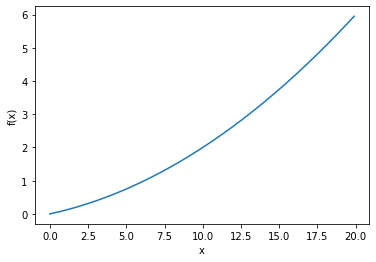

In [213]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [214]:
# x=5일 때와 10일 때 위 함수의 미분을 계산하면
numerical_diff(function_1, 5)

0.1999999999990898

In [215]:
numerical_diff(function_1, 10)

0.2999999999986347

- 수치 미분과 해석적 미분은 실제로 거의 같은 값이라고 해도 될 만큼 작은 오차를 가진다.
- 수치 미분 값을 기울기로 하는 직선을 그려보면, 함수의 접선에 해당한다.

### 4.3.3 편미분

- 변수가 2개인 인수들의 제곱 합을 계산하는 식을 파이썬으로 구현해 보자.

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

- 편미분도 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.
- 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

## 4.4 기울기

- $x_0$과 $x_1$의 편미분을 동시에 계산하고 싶다면 어떻게 할까?
- 모든 변수의 편미분을 벡터로 정리한 것을 기울기gradient라고 한다.
- 기울기는 각 지점에서 낮아지는 방향, 즉 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향을 가리킨다.

### 4.4.1 경사법(경사 하강법)

- 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기이지만, 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.
- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법이다.
- 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다.
- 경사법을 수식으로 나타내면 다음과 같다.  
 $x_0=x_0-η\frac{∂f}{∂x_0}$  
  
 $x_1=x_1-η\frac{∂f}{∂x_1}$

- η기호 에타eta는 갱신하는 양을 나타내며, 이를 신경망 학습에서는 학습률learning rate라고 한다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신할지를 정하는 것이 학습률이다.
- 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 하며, 일반적으로 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없다. 신경망 학습에서는 이 값을 변경하면서 올바르게 학습하고 있는지 확인하며 진행한다.

In [ ]:
# 경사 하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x):
        x -= lr * grad
    return x
# 이 함수로 함수의 극솟값을 구할 수 있고 잘하면 최솟값을 구할 수도 있다.

- 학습률이 너무 크면 큰 값으로 발산하고, 너무 작으면 거의 갱신되지 않은 채 끝난다.
- 학습률 같은 매개변수를 하이퍼파라미터라고 한다.
 - 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수이다.
 - 일반적으로 하이퍼파라미터는 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

### 4.4.2 신경망에서의 기울기

- 가중치 매개변수에 대한 손실 함수의 기울기
- 가중치가 $W$, 손실 함수가 $L$인 신경망이 있다면, 경사는 $\frac{∂L}{∂W}$이다.
- $\frac{∂L}{∂W}$의 각 원소는 각각의 원소에 관한 편미분이다.
- $\frac{∂L}{∂W}$의 형상은 $W$와 같다.
- 신경망의 기울기를 구한 다음에는 경사법에 따라 가중치 매개변수를 갱신하기만 하면 된다.

## 4.5 학습 알고리즘 구현하기

- 신경망 학습의 절차
 - 전제  
    신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.
 - 1단계: 미니배치  
    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
 - 2단계: 기울기 산출  
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
 - 3단계: 매개변수 갱신  
    가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
 - 4단계: 반복  
    1~3단계를 반복한다.

> 데이터를 미니배치로 무작위 선정하기 때문에 <b>확률적 경사 하강법</b>stochastic gradient descent(<b>SGD</b>)이라고 부른다. 대부분의 딥러닝 프레임워크는 SGD라는 함수로 이 기능을 구현한다.

### 4.5.1 2층 신경망 클래스 구현하기

In [217]:
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [218]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [219]:
net.params['b1'].shape

(100,)

In [220]:
net.params['W2'].shape

(100, 10)

In [221]:
net.params['b2'].shape

(10,)

- 이와 같이 params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다.
- params 변수에 저장된 가중치 매개변수는 예측 처리(순방향 처리)에서 사용된다.

- grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.

In [222]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) # 시간이 꽤 걸린다. 오파역전파법으로 기울기를 구하면 훨씬 빠르게 구할 수 있다고 한다.

grads['W1'].shape

(784, 100)

In [223]:
grads['b1'].shape

(100,)

In [224]:
grads['W2'].shape

(100, 10)

In [225]:
grads['b2'].shape

(10,)

### 4.5.2 미니배치 학습 구현하기

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

- 손실 함수의 값은 학습 횟수가 늘면서 줄어든다. 다시 말해 데이터를 반복학습함으로써 최적 가중치 매개변수로 다가선다.

### 4.5.3 시험 데이터로 평가하기

- 에폭은 하나의 단위이다. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다.
 - 예컨대 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련데이터를 소진한 게 된다. 이 경우 100회가 1에폭이 된다.
- 정확도는 1에폭마다 계산한다.
 - for문 안에서 매번 계산하기에는 시간이 오래 걸리고, 또 그렇게 자주 기록할 필요도 없기 때문이다.
 - 더 큰 관점에서 추이를 알 수 있으면 충분하다.

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7875666666666666, 0.7934
train acc, test acc | 0.8743333333333333, 0.8771
train acc, test acc | 0.8960833333333333, 0.902
train acc, test acc | 0.9083666666666667, 0.9134
train acc, test acc | 0.91455, 0.9172
train acc, test acc | 0.91995, 0.9224
train acc, test acc | 0.9252166666666667, 0.9262
train acc, test acc | 0.92885, 0.9302
train acc, test acc | 0.9325166666666667, 0.933
train acc, test acc | 0.9351666666666667, 0.9359
train acc, test acc | 0.938, 0.9372
train acc, test acc | 0.9402, 0.9392
train acc, test acc | 0.9419666666666666, 0.941
train acc, test acc | 0.9443666666666667, 0.9439
train acc, test acc | 0.9461833333333334, 0.9436
train acc, test acc | 0.94815, 0.9462


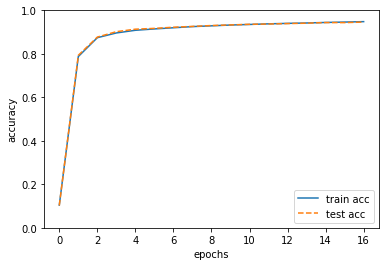

In [231]:
# 미니배치 학습 구현에서 사용했던 코드를 추가 활용하여, 훈련 데이터와 시험 데이터에 대한 정확도 추이를 그래프로 나타내 보자.

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


- 에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있으며, 두 정확도에는 차이가 없으므로 위 학습에서는 오버피팅이 일어나지 않았다.
- 훈련 데이터에 지나치게 적응하는 오버피팅이 발생할 경우, 훈련 데이터와 다른 데이터를 보면 잘못된 판단을 하기 시작하여 어느 순간부터 시험 데이터에 대한 정확도가 점차 떨어진다.
 - 오버피팅이 시작되는 순간을 포착해 학습을 중단하면 오버피팅을 효과적으로 예방할 수 있다.
 - 이 기법을 조기 종료(early stopping)라 하며, 챕터6에서 소개하는 '가중치 감소', '드롭아웃'과 함께 대표적인 오버피팅 예방법이다.

## 4.6 정리

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단한다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.